# Frequency enrichment of a gene in stem-cell (smedwi+) vs mature (smedwi-) cells

In [1]:
import pickle
import scipy as sp
import numpy as np
import pandas as pd
import anndata
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# from samalg import SAM
# from samalg.gui import SAMGUI
# import samalg.utilities as ut

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from samalg import SAM
sam = SAM()
# total combo atlas
sam.load_data('data/brain_combined_samobj.h5ad')
genes = sam.adata.var_names

/home/sam/anaconda3/envs/ssSeq/lib/python3.6/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


## gene lists
contigs you're interested in

In [3]:
pc2='dd_Smed_v4_1566_0_1'
smedwi_1 = 'dd_Smed_v4_659_0_1'
trpa='dd_Smed_v4_14207_0_1'


 
trans_fact = [
    'dd_Smed_v4_17498_0_1',
    'dd_Smed_v4_13056_0_1',
    'dd_Smed_v4_25321_0_1',
    'dd_Smed_v4_13898_0_1',
    'dd_Smed_v4_12021_0_1',
    'dd_Smed_v4_50245_0_1',
    'dd_Smed_v4_8606_0_1',
    'dd_Smed_v4_12068_0_1',
    'dd_Smed_v4_13843_0_1',
    'dd_Smed_v4_14633_0_1',
    'dd_Smed_v4_19326_0_1',
    'dd_Smed_v4_33456_0_1',
             ]           
trans_fact_names = ['mblk','tcf1','soxb2','nkx2.1','gtf2h5','foxq2','pknox','pou6f1','cut-like','otxA','otp','nkx2.4']


transmitter =['dd_Smed_v4_1566_0_1','dd_Smed_v4_18607_0_1',
    'dd_Smed_v4_12653_0_1',
    'dd_Smed_v4_42610_0_1',
    'dd_Smed_v4_1106_0_1',
    'dd_Smed_v4_11206_0_1',
    'dd_Smed_v4_8169_0_1',
    'dd_Smed_v4_10192_0_1',
    'dd_Smed_v4_896_0_1',
    'dd_Smed_v4_6208_0_1',
    'dd_Smed_v4_16581_0_1',
             ]
transmitter_names = ['pc2','seratonin','gad','tbh','eaat-1','eaat-2','gat','vGlut','gs','chat','th',]

transmitterShort =['dd_Smed_v4_1566_0_1','dd_Smed_v4_18607_0_1',
    'dd_Smed_v4_12653_0_1',
    'dd_Smed_v4_42610_0_1',
    'dd_Smed_v4_10192_0_1',
    'dd_Smed_v4_6208_0_1',
    'dd_Smed_v4_16581_0_1',
             ]
transmitterShort_names = ['pc2','seratonin','gad','tbh','vGlut','chat','th',]


receptor = ['dd_Smed_v4_16476_0_1',
    'dd_Smed_v4_14655_0_1',
    'dd_Smed_v4_25116_0_1',
    'dd_Smed_v4_20665_0_1',
    'dd_Smed_v4_43637_0_1',
    'dd_Smed_v4_41696_0_1',
    'dd_Smed_v4_21924_0_1',
    'dd_Smed_v4_44801_0_1'
           ]
receptor_names = ['gluR1','gluR2','gabrA','gabrB','oar','oamb','dopamine/oar','adrenergic receptor']

neuropep = ['dd_Smed_v4_5133_0_1',
    'dd_Smed_v4_798_0_1',
    'dd_Smed_v4_4046_0_1',
    'dd_Smed_v4_889_0_1',
    'dd_Smed_v4_4624_0_1',
    'dd_Smed_v4_8966_0_1',
    'dd_Smed_v4_13874_0_1',
    'dd_Smed_v4_1902_0_1',
    'dd_Smed_v4_2748_0_1',
    'dd_Smed_v4_2575_0_1',
    'dd_Smed_v4_1015_0_1',
    'dd_Smed_v4_2270_0_1',
    'dd_Smed_v4_4417_0_1',
    'dd_Smed_v4_6856_0_1',
    'dd_Smed_v4_1117_0_1',
    'dd_Smed_v4_1483_0_1',
    'dd_Smed_v4_8852_0_1',
    'dd_Smed_v4_10191_0_1',
    'dd_Smed_v4_2370_0_1',
    'dd_Smed_v4_6375_0_1',
    'dd_Smed_v4_7141_0_1',
    'dd_Smed_v4_13221_0_1',
    'dd_Smed_v4_77250_0_1',
    'dd_Smed_v4_2412_0_1',
    'dd_Smed_v4_13645_0_1',
    'dd_Smed_v4_16946_0_1',
    'dd_Smed_v4_14095_0_1',
    'dd_Smed_v4_3211_0_1',
    'dd_Smed_v4_1520_0_1',
    'dd_Smed_v4_541_0_1',
    'dd_Smed_v4_10098_0_1',
    'dd_Smed_v4_788_0_1',
    'dd_Smed_v4_4051_0_1',
    'dd_Smed_v4_3845_0_1',
    'dd_Smed_v4_9341_0_1',
    'dd_Smed_v4_1724_0_1',
    'dd_Smed_v4_1538_0_1',
    'dd_Smed_v4_6003_0_1',
    'dd_Smed_v4_1545_0_1',
    'dd_Smed_v4_584_0_1',
    'dd_Smed_v4_1588_0_1',
           ]
neuropep_names = neuropep.copy()

synapt = ['dd_Smed_v4_4222_0_1',
         'dd_Smed_v4_6730_0_1',
         'dd_Smed_v4_7243_0_1',
         'dd_Smed_v4_6920_0_1',
         'dd_Smed_v4_13680_0_1']
synapt_names = ['syt1',
               'syt1b',
               'syt4',
               'syt1a',
               'syt1p']

neo_tf= ['_14661_0_1',
    '_14633_0_1',
    '_75162_0_1',
    '_15144_0_1',
    '_20755_0_1',
    '_13898_0_1',
    '_11198_0_1',
    '_94635_0_1',
    '_15516_0_1',
#     '_21801_0_1',
    '_17726_0_1',
    '_35892_0_1',
    '_13772_0_1',
    '_25321_0_1',
    '_13056_0_1',
    '_6778_0_1',
    '_15178_0_1',
    '_50245_0_1',
    '_9906_0_1',
    '_95726_0_1',
    '_15253_0_1',
    '_11521_0_1',
    '_17498_0_1',
    '_13215_0_1',
    '_8340_0_1',
    '_15331_0_1',
    '_8606_0_1',
    '_12068_0_1',
    '_21801_']

neo_tf_names=['elf-1',
    'otxa',
    'glass',
    'lhx2/9',
    'lhx3/4',
    'nkx2.1',
    'nkx6',
    'nr-1',
    'otxb',
    #'pax3/7',
    'pax6a',
    'pax6b',
    'prox-1',
    'soxb-2',
    'tcf1',
    'castor',
    'six3',
    'foxq2',
    'neuroD-1',
    'klf',
    'pitx',
    'lhx1/5',
    'mblk',
    'soxb',
    'fgfr3',
    'zic2',
    'pknox',
    'pou6',
    'arx (pax3/7)'
             ]

neo_tf_2 = [
    'dd_Smed_v4_17731_0_1',
    'dd_Smed_v4_22479_0_1',
    'dd_Smed_v4_9893_0_1',
    'dd_Smed_v4_17951_0_1',
    'dd_Smed_v4_12722_0_1',
    'dd_Smed_v4_9171_0_1',
    'dd_Smed_v4_17534_0_1',
    'dd_Smed_v4_12677_0_1',
    'dd_Smed_v4_5579_0_1',
    'dd_Smed_v4_4415_0_1',
    'dd_Smed_v4_7938_0_1',
    'dd_Smed_v4_3410_0_1',
    'dd_Smed_v4_12634_0_1',
    'dd_Smed_v4_10792_0_1',
    'dd_Smed_v4_26877_0_1',
    'dd_Smed_v4_7316_0_1',
    'dd_Smed_v4_7738_0_1',
    'dd_Smed_v4_9226_0_1',
    'dd_Smed_v4_3641_0_1',
    'dd_Smed_v4_4871_0_1',
    'dd_Smed_v4_8611_0_1',
    'dd_Smed_v4_9899_0_1',
    'dd_Smed_v4_4048_0_1',
    'dd_Smed_v4_3140_0_1',
    'dd_Smed_v4_7227_0_1',
    'dd_Smed_v4_31217_0_1',
    'dd_Smed_v4_8234_0_1',
    #'dd_Smed_v4_6778_0_1',
    'dd_Smed_v4_16222_0_1',
    'dd_Smed_v4_47123_0_1',
    'dd_Smed_v4_48430_0_1',
    'dd_Smed_v4_16375_0_1',
]
neo_tf_2_names = [
    'sim',
    'hesl-3',
    'coe',
    'twist',
    'e22/23 (olig1)',
    'arnt',
    'arh (ahr?)',
    'atoh8-1',
    'da',
    'mxi-1',
    'mitfl-1',
    'max',
    'myo-D',
    'ap4-1',
    'atoh',
    'mitfl-2',
    'mitfl-3',
    'mlxipl',
    'srebp',
    'usf',
    'ap4-2',
    'atoh8-2',
    'mxi-2',
    'mlx',
    'soxp-1',
    'hlh-1',
    'pou2/3',
    #'castor',
    'runt',
    'arrowhead',
    'ovo',
    'meis',

]

neo_tf.extend(neo_tf_2)
neo_tf_names.extend(neo_tf_2_names)
pop_list = ['runt','myo-D','soxp-1','fgfr3']

for g in pop_list:
    ind = neo_tf_names.index(g)
    print(ind)
    neo_tf_names.pop(ind)
    neo_tf.pop(ind)


NTnew =['dd_Smed_v4_1566_0_1','dd_Smed_v4_12700_0_1',
    'dd_Smed_v4_12653_0_1',
    'dd_Smed_v4_42610_0_1',
    'dd_Smed_v4_10192_0_1',
    'dd_Smed_v4_6208_0_1',
    'dd_Smed_v4_16581_0_1',
    'dd_Smed_v4_5713_0_1',
             ]
NTnew_names = ['peptidergic','serotonergic','gabaergic','octopaminergic','glutaminergic','cholinergic','dopaminergic', 'glycinergic']

lcc_2=['_24908_','_25116_','_15331_','_11342_','_10794_','_18321_','_18238_',
      '_8110_','_14666_','_23837_','_14811_','_70812_','_4389_']  #BO-derived, neural channel 
lcc_2_names=['_24908_','_25116_','_15331_','_11342_','_10794_','_18321_','_18238_',
      '_8110_','_14666_','_23837_','_14811_','_70812_','kcc']  #BO-derived, neural channel 

55
40
51
23


## Identify cells with and without smedwi-1
(could apply this to other gene delineators by changing pos_target)

In [6]:
def target_to_ind(target,data,genes):
    if type(target) is str:
        target=[target]
    target_ind = np.zeros(len(target))
    for i, contig in enumerate(genes):
        for j, targ in enumerate(target):
            if targ in contig:
                target_ind[j] = i
    return target_ind.astype(int)

def extract_pos_cells(target,data,genes, ind=False):
    if '' in target:
        ind_pos = np.arange(data.shape[0])
    else:
        target_ind = target_to_ind(target,data,genes)
        pos_cells = data[:,target_ind].sum(axis=1)
        ind_pos = np.where(pos_cells>0)[0]
    print(f'{ind_pos.size}/{data.shape[0]}')
    if ind:
        return ind_pos
    else:
        return data[ind_pos]
    
def extract_neg_cells(target,data,genes, ind=False):
    if '' in target:
        ind_pos = np.arange(data.shape[0])
    else:
        target_ind = target_to_ind(target,data,genes)
        pos_cells = data[:,target_ind].sum(axis=1)
        ind_pos = np.where(pos_cells==0)[0]
    print(f'{ind_pos.size}/{data.shape[0]}')
    if ind:
        return ind_pos
    else:
        return data[ind_pos]

pos_target=[]
pos_target.extend(['dd_Smed_v4_659_0_1'])

#run pos or neg version
combined_pos = extract_pos_cells(pos_target,sam.adata_raw.X,genes)
combined_neg = extract_neg_cells(pos_target,sam.adata_raw.X,genes)

5343/19673
14330/19673


## Define the list of genes you want to test

In [7]:
subset_A_gene = []
subset_A_gene_names = []
# subset_A_gene.extend(receptor)
# subset_A_gene_names.extend(receptor_names)
# subset_A_gene.extend(trans_fact)
# subset_A_gene_names.extend(trans_fact_names)
# subset_A_gene.extend(transmitterShort)
# subset_A_gene_names.extend(transmitterShort_names)
# subset_A_gene.extend(neuropep)
# subset_A_gene_names.extend(neuropep_names)
# subset_A_gene.extend(synapt)
# subset_A_gene_names.extend(synapt_names)
# subset_A_gene.extend(synapt)
# subset_A_gene_names.extend(synapt_names)
# subset_A_gene.append('_659_')
# subset_A_gene_names.append('smedwi-1')
subset_A_gene.extend(neo_tf)
subset_A_gene_names.extend(neo_tf_names)
# subset_A_gene.extend(NTnew)
# subset_A_gene_names.extend(NTnew_names)
# subset_A_gene.extend(lcc_2)
# subset_A_gene_names.extend(lcc_2_names)

#calculation
fraction_pos = []
fraction_neg = []
for g in subset_A_gene:
    gene_num = target_to_ind(g,None,genes)[0]
    if gene_num==0:
        print(g)
    fraction_pos.append(np.mean(combined_pos[:,gene_num]>0))
    fraction_neg.append(np.mean(combined_neg[:,gene_num]>0))
fraction_pos = np.array(fraction_pos)
fraction_neg = np.array(fraction_neg)

## Plot

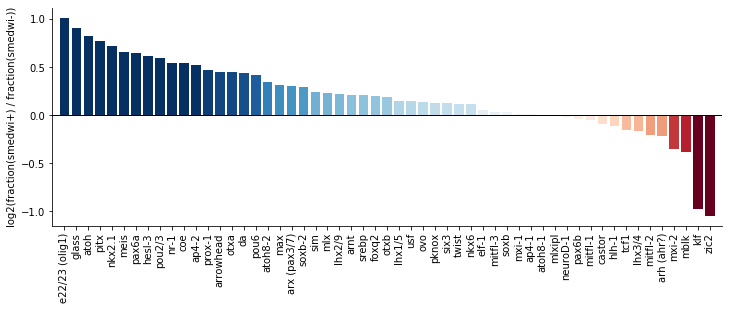

In [8]:
ratio = np.log2(fraction_pos/fraction_neg)

ind = np.argsort(-ratio)
fig = plt.figure(figsize=(12,4))
ax = fig.gca()
x = np.arange(ratio.size)
# plt.bar(x,ratio[ind],)

for xx,yy in zip(x,ratio[ind]):
    plt.bar([xx],[yy],facecolor=plt.cm.RdBu(yy+.5))

plt.xticks(x,labels=np.array(subset_A_gene_names)[ind],rotation=90)
plt.xlim(-1,x[-1]+1)
plt.ylabel('log2(fraction(smedwi+) / fraction(smedwi-))')
plt.plot([-1,x[-1]+1],[0,0],c='k',lw=1)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

plt.rcParams['svg.fonttype']='none'
fig.savefig('PLOTS/neoblastEnrichment_TFs_log.svg')

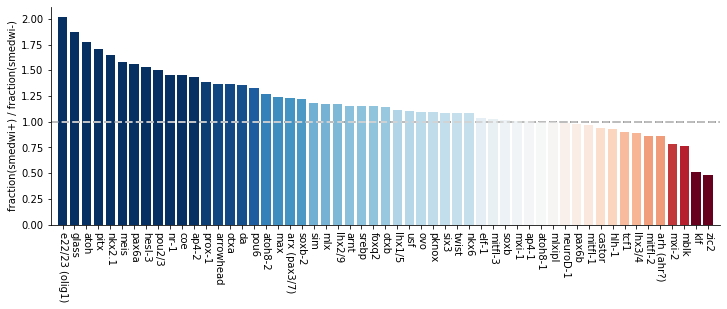

In [9]:
ratio = (fraction_pos/fraction_neg)

ind = np.argsort(-ratio)
fig = plt.figure(figsize=(12,4))
ax = fig.gca()
x = np.arange(ratio.size)
# plt.bar(x,ratio[ind],)

for xx,yy in zip(x,ratio[ind]):
    plt.bar([xx],[yy],facecolor=plt.cm.RdBu(np.log2(yy)+.5))

plt.xticks(x,labels=np.array(subset_A_gene_names)[ind],rotation=-90)
plt.xlim(-1,x[-1]+1)
plt.ylabel('fraction(smedwi+) / fraction(smedwi-)')
plt.plot([-1,x[-1]+1],[1,1],c='lightgrey',lw=2,ls='--',alpha=.9)
plt.plot([-1,x[-1]+1],[1,1],c='k',lw=2,ls='--',zorder=-3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()
plt.rcParams['svg.fonttype']='none'
# fig.savefig('PLOTS/neoblastEnrichment_TFs_linear.svg')